# Project Title : RETAIL SALES PREDICTION : Predicting sales of a major store chain Rossmann

**Problem Description**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

**Data Description**

Rossmann Stores Data.csv - historical data including Sales
store.csv - supplemental information about the stores

**Data fields**
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set
Store - a unique Id for each store
Sales - the turnover for any given day (this is what you are predicting)
Customers - the number of customers on a given day
Open - an indicator for whether the store was open: 0 = closed, 1 = open
StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
StoreType - differentiates between 4 different store models: a, b, c, d
Assortment - describes an assortment level: a = basic, b = extra, c = extended
CompetitionDistance - distance in meters to the nearest competitor store
CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day
Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Importing Necessary Libraries

In [1]:
# Libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**LOADING THE DATA**

In [2]:
store='/content/store.csv'
store=pd.read_csv(store)

In [3]:
rsd='/content/Rossmann Stores Data.csv'
ross_data=pd.read_csv(rsd)

# Exploratory Data Analysis
We have two datasets - 'ross_data' and 'store'. Let's try and understand the basics of these two datasets one by one.

**Data Collection and Preprocessing**

In [4]:
ross_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555.0,1.0,1.0,0,1.0
1,2,5,2015-07-31,6064,625.0,1.0,1.0,0,1.0
2,3,5,2015-07-31,8314,821.0,1.0,1.0,0,1.0
3,4,5,2015-07-31,13995,1498.0,1.0,1.0,0,1.0
4,5,5,2015-07-31,4822,559.0,1.0,1.0,0,1.0


In [5]:
# No. of rows and columns of ross_data
print('Shape of ross_data is', ross_data.shape)
print('No. of rows in ross_data are', ross_data.shape[0])
print('No. of columns in ross_data are', ross_data.shape[1])

Shape of ross_data is (252322, 9)
No. of rows in ross_data are 252322
No. of columns in ross_data are 9


In [6]:
#columns

ross_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [7]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [8]:
# Concize summary of ross_data
ross_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252322 entries, 0 to 252321
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          252322 non-null  int64  
 1   DayOfWeek      252322 non-null  int64  
 2   Date           252322 non-null  object 
 3   Sales          252322 non-null  int64  
 4   Customers      252321 non-null  float64
 5   Open           252321 non-null  float64
 6   Promo          252321 non-null  float64
 7   StateHoliday   252321 non-null  object 
 8   SchoolHoliday  252321 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 17.3+ MB


In [9]:
# Descriptive Stats of ross_data dataset
ross_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,252322.000000,252322.000000,252322.000000,252321.000000,252321.000000,252321.000000,252321.000000
mean,558.061362,3.982744,5947.773313,629.382497,0.825425,0.394141,0.170541
std,321.938372,1.994274,3966.729413,462.547190,0.379604,0.488666,0.376108
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.000000,2.000000,3852.000000,407.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5950.000000,609.000000,1.000000,0.000000,0.000000
75%,837.000000,6.000000,8115.000000,833.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.000000,1.000000,1.000000


In [10]:
# Top five rows of the dataset
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
# No. of rows and columns
print('No of rows in the dataset (store) are', store.shape[0])
print('No of columns in the dataset (store) are', store.shape[1])

No of rows in the dataset (store) are 1115
No of columns in the dataset (store) are 10


In [12]:
# Descriptive Stats of store dataset
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [13]:
# Concise summary of store
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# Handling Missing Values

In [14]:
# Sum of null values
store.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [15]:
# Null value (percentage) of total dataset(store).
(store.isnull().sum()/store.shape[0])*100

,0
Store,0.000000
StoreType,0.000000
Assortment,0.000000
CompetitionDistance,0.269058
CompetitionOpenSinceMonth,31.748879
CompetitionOpenSinceYear,31.748879
Promo2,0.000000
Promo2SinceWeek,48.789238
Promo2SinceYear,48.789238
PromoInterval,48.789238


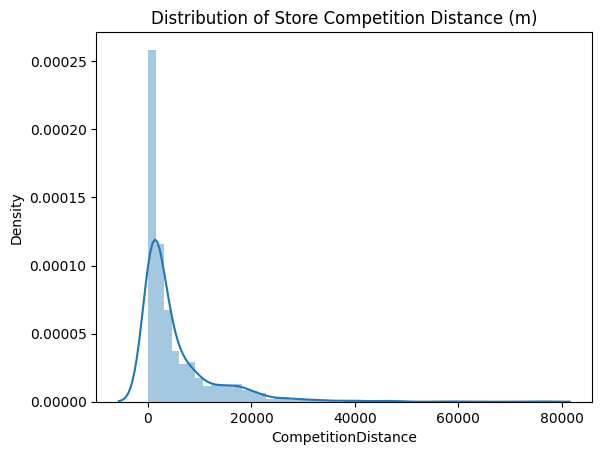

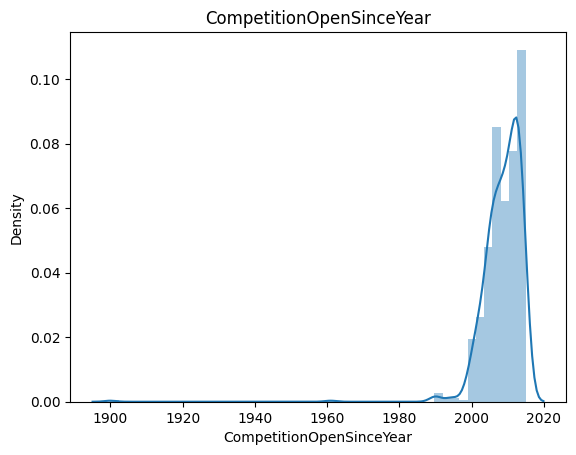

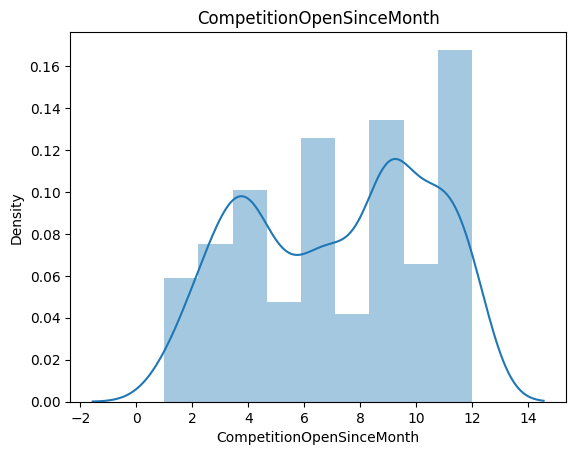

In [16]:
# Distribution of CompetitionDistance
sns.distplot(store.CompetitionDistance)
plt.title('Distribution of Store Competition Distance (m)')
plt.show()

# # Distribution of CompetitionOpenSinceYear

plt.title('CompetitionOpenSinceYear')
sns.distplot(store.CompetitionOpenSinceYear)
plt.show()

# Distribution of CompetitionOpenSinceMonth

plt.title('CompetitionOpenSinceMonth')
sns.distplot(store.CompetitionOpenSinceMonth)
plt.show()

Dristribution of CompetitionDistance is right skewed so we'll replace the missing values with the median.

In [17]:
# Replacing missing values with median value
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median() ,inplace = True)

Since the columns 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' both are categorical columns(Months and Years) so we will replace the missing values with mode of particular column and we can see in the code cell below that both columns have only 1 mode.

In [18]:
# Checking for modes
print(store['CompetitionOpenSinceMonth'].mode())
print(store['CompetitionOpenSinceYear'].mode())

0    9.0
Name: CompetitionOpenSinceMonth, dtype: float64
0    2013.0
Name: CompetitionOpenSinceYear, dtype: float64


In [19]:
# Replacing null values with mode
store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [20]:
# Head
store.head(10).T

,0,1,2,3,4,5,6,7,8,9
Store,1,2,3,4,5,6,7,8,9,10
StoreType,c,a,a,c,a,a,a,a,a,a
Assortment,a,a,a,c,a,a,c,a,c,a
CompetitionDistance,1270.0,570.0,14130.0,620.0,29910.0,310.0,24000.0,7520.0,2030.0,3160.0
CompetitionOpenSinceMonth,9.0,11.0,12.0,9.0,4.0,12.0,4.0,10.0,8.0,9.0
CompetitionOpenSinceYear,2008.0,2007.0,2006.0,2009.0,2015.0,2013.0,2013.0,2014.0,2000.0,2009.0
Promo2,0,1,1,0,0,0,0,0,0,0
Promo2SinceWeek,NaN,13.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo2SinceYear,NaN,2010.0,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PromoInterval,NaN,"Jan,Apr,Jul,Oct","Jan,Apr,Jul,Oct",NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can observe that 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval' are NaN where Promo2 is zero and they have nearly 50% missing value so we will drop these columns.

In [21]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [22]:
#dropping columns from store dataset
store.drop('Promo2SinceWeek',axis=1,inplace=True)
store.drop('Promo2SinceYear',axis=1,inplace=True)
store.drop('PromoInterval',axis=1,inplace=True)

In [23]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2'],
      dtype='object')

In [24]:
# Null values sum (store)
store.isna().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0


In [25]:
# Null values sum (ross_data)
ross_data.isna().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,1
Open,1
Promo,1
StateHoliday,1
SchoolHoliday,1


**Value counts in following columns**

In [26]:
# Values Counts
print('DayOfWeek:\n', ross_data['DayOfWeek'].value_counts(), '\n\n' )
print('Open:\n', ross_data['Open'].value_counts(), '\n\n' )

DayOfWeek:
 DayOfWeek
5    36435
4    36435
3    36255
2    36255
1    36255
7    35367
6    35320
Name: count, dtype: int64 


Open:
 Open
1.0    208272
0.0     44049
Name: count, dtype: int64 




In [27]:
# Value count cont.
print('Promo:\n', ross_data['Promo'].value_counts(), '\n\n' )
print('StateHoliday:\n', ross_data['StateHoliday'].value_counts(), '\n\n')
print('SchoolHoliday:\n', ross_data['SchoolHoliday'].value_counts())

Promo:
 Promo
0.0    152871
1.0     99450
Name: count, dtype: int64 


StateHoliday:
 StateHoliday
0    242722
a      5499
b      2230
c      1870
Name: count, dtype: int64 


SchoolHoliday:
 SchoolHoliday
0.0    209290
1.0     43031
Name: count, dtype: int64


Checking unique value in StateHoliday because it has two zeros.

In [28]:
#Checking unique value
ross_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', nan], dtype=object)

In 'StateHoliday' 0 is repeated so, we will fix this using lambda function.

**Barplot of StateHoliday vs Sales and StateHoliday vs Customers to check significance of different values.**

<Axes: title={'center': 'StateHoliday vs Customers'}, xlabel='StateHoliday', ylabel='Customers'>

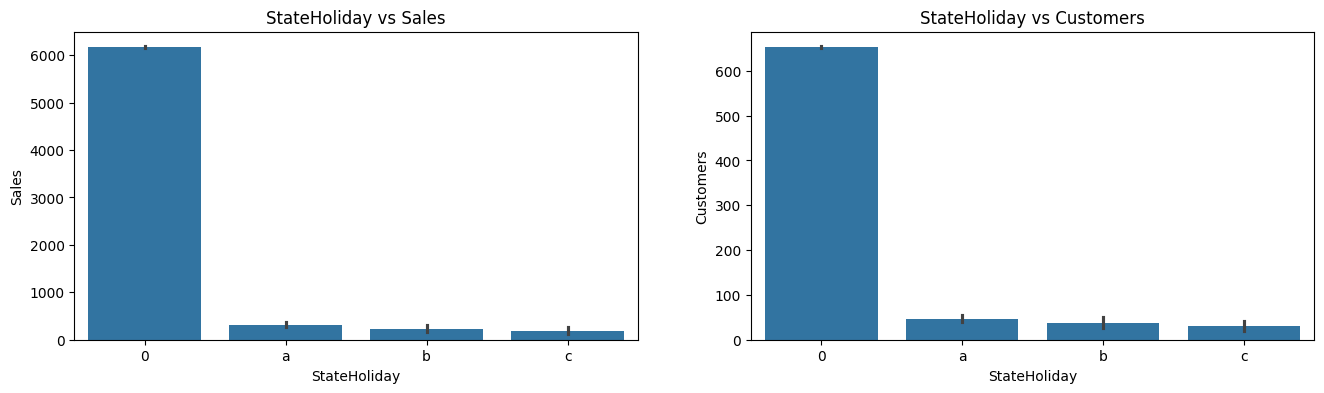

In [29]:
fig, (state1, state2) = plt.subplots(1,2,figsize= (16,4))

# Barplot of StateHoliday vs Sales
state1.title.set_text('StateHoliday vs Sales')
sns.barplot(x = 'StateHoliday', y = 'Sales', data = ross_data, ax = state1)

# Barplot of StateHoliday vs Customers
state2.title.set_text('StateHoliday vs Customers')
sns.barplot(x = 'StateHoliday', y = 'Customers', data = ross_data, ax = state2)

There is no significant difference in the value of sales of state holiday type a, b and c as compared to '0'. So, we can treat different types of stateholidays in same way. Thus we can replace state holiday type a, b & c by 1 only.

In [30]:
# Replacing 'a', 'b' and 'c' with 1
ross_data.StateHoliday.replace({'a': 1,
                                'b' : 1,
                                'c' : 1
                                }, inplace = True )

In [31]:
# Verifying
ross_data['StateHoliday'].value_counts()

,count
StateHoliday,
0,242722
1,9599


In [32]:
# Extracting of data from 'Date' column
ross_data['Year'] = pd.to_datetime(ross_data['Date'], format='%Y-%m-%d').dt.year
ross_data['Month'] = pd.to_datetime(ross_data['Date'], format='%Y-%m-%d').dt.month
ross_data['Day'] = pd.to_datetime(ross_data['Date'], format='%Y-%m-%d').dt.day
ross_data['DayOfWeek'] = pd.to_datetime(ross_data['Date'], format='%Y-%m-%d').dt.isocalendar().week

**Distribution of 'Sales'**

<Axes: xlabel='Sales', ylabel='Density'>

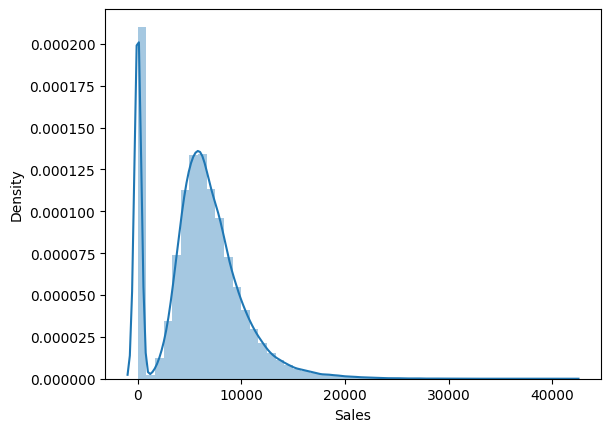

In [33]:
# distribution plot
sns.distplot(ross_data['Sales'])

**Sales per store type**

Text(0.5, 1.0, 'Sales per store type')

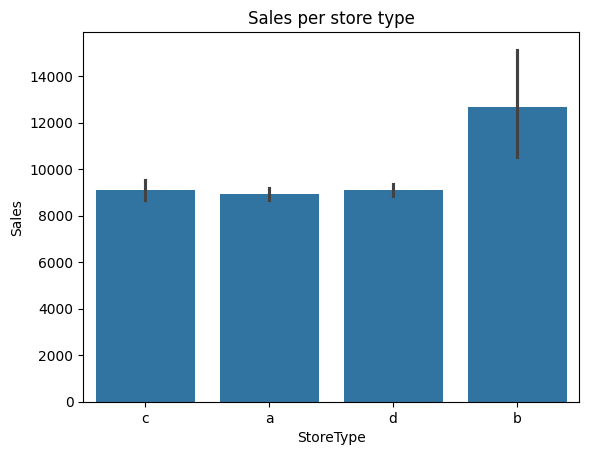

In [34]:
# Barplot
sns.barplot(x = store['StoreType'], y = ross_data['Sales'])
plt.title('Sales per store type')

**Sales vs Assortment**

Text(0.5, 1.0, 'Sales vs Assortment')

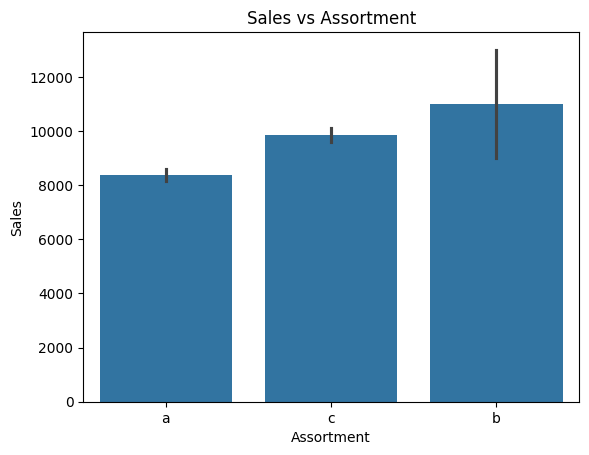

In [35]:
# Barplot
sns.barplot(x = store['Assortment'], y = ross_data['Sales'])
plt.title('Sales vs Assortment')

**Effect of promotion in sales and number of customers.**

<Axes: title={'center': 'Promo vs Customers'}, xlabel='Promo', ylabel='Customers'>

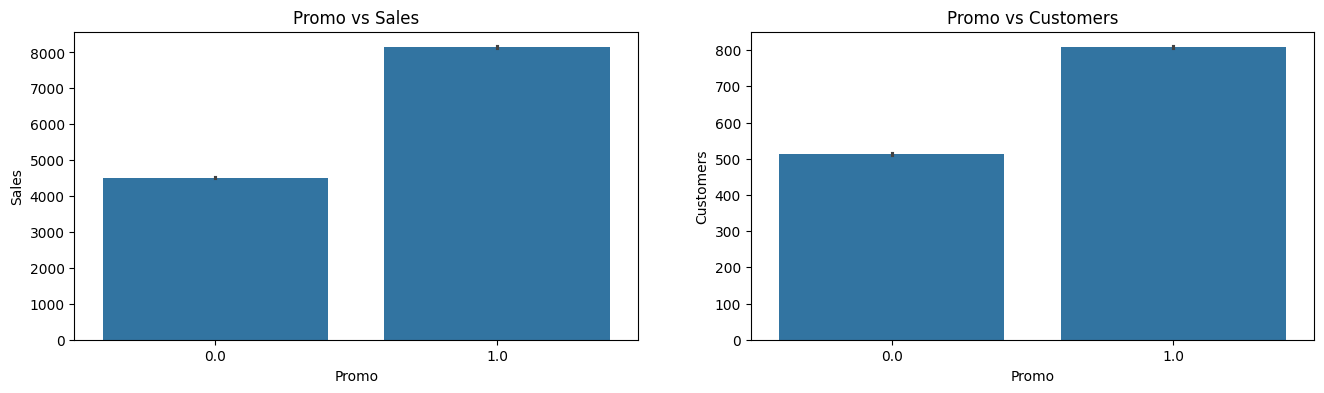

In [36]:
# Barplot
fig, (fig1, fig2) = plt.subplots(1,2,figsize= (16,4))

# Barplot of Promo vs Sales
fig1.title.set_text('Promo vs Sales')
sns.barplot(x = 'Promo', y = 'Sales', data = ross_data, ax = fig1)

# Barplot of Promo vs Customers
fig2.title.set_text('Promo vs Customers')
sns.barplot(x = 'Promo', y = 'Customers', data = ross_data, ax = fig2)

Here we can observe that Sales and number of customers increase significantly during promo periods. This shows that promotion have a positive effect of stores

**Sales vs holidays**

<Axes: title={'center': 'StateHolidays vs Customers'}, xlabel='StateHoliday', ylabel='Customers'>

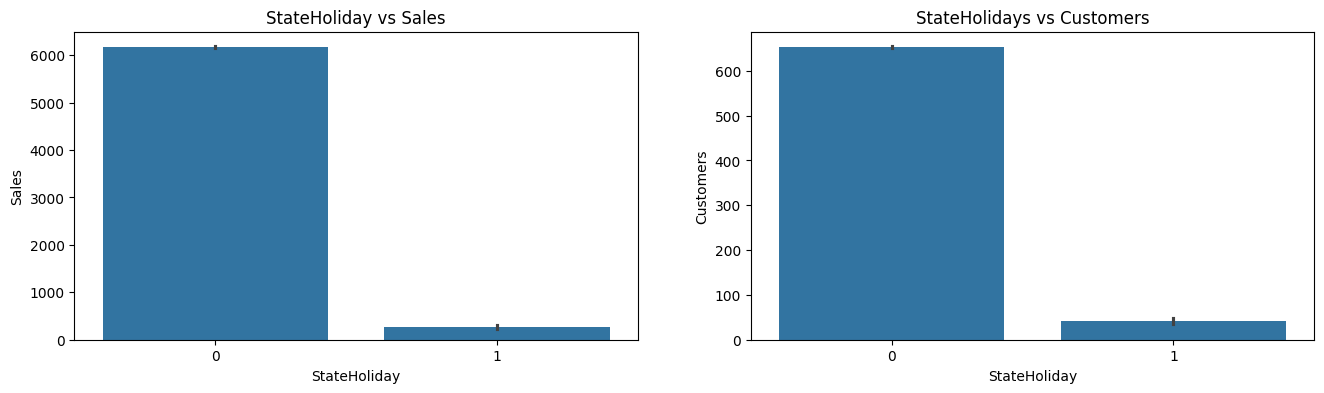

In [37]:
# Barplot
fig, (fig3, fig4) = plt.subplots(1,2,figsize= (16,4))

# StateHoliday vs Sales
fig3.title.set_text('StateHoliday vs Sales')
sns.barplot(x = 'StateHoliday', y = 'Sales', data = ross_data, ax = fig3)

# StateHoliday vs Customers
fig4.title.set_text('StateHolidays vs Customers')
sns.barplot(x = 'StateHoliday', y = 'Customers', data = ross_data, ax = fig4)

Only a few stores are open on state holidays.

**Sales and number of customers on School Holidays**

<Axes: title={'center': 'SchoolHoliday vs Customers'}, xlabel='SchoolHoliday', ylabel='Customers'>

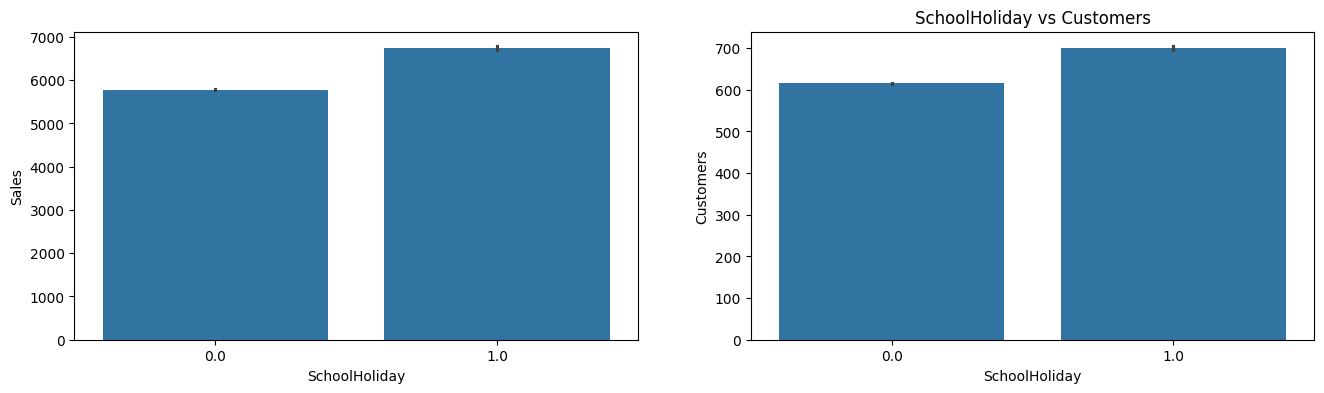

In [38]:
# Barplot
fig, (fig_1, fig_2) = plt.subplots(1,2,figsize= (16,4))

# SchoolHoliday vs Sales
fig_2.title.set_text('SchoolHoliday vs Sales')
sns.barplot(x = 'SchoolHoliday', y = 'Sales', data = ross_data, ax = fig_1)

# Schoolholiday vs number of customers
fig_2.title.set_text('SchoolHoliday vs Customers')
sns.barplot(x = 'SchoolHoliday', y = 'Customers', data = ross_data, ax = fig_2)


We can observe that there is slight increase in sales and number of customers visiting on school holidays.

**Open stores per day of week**

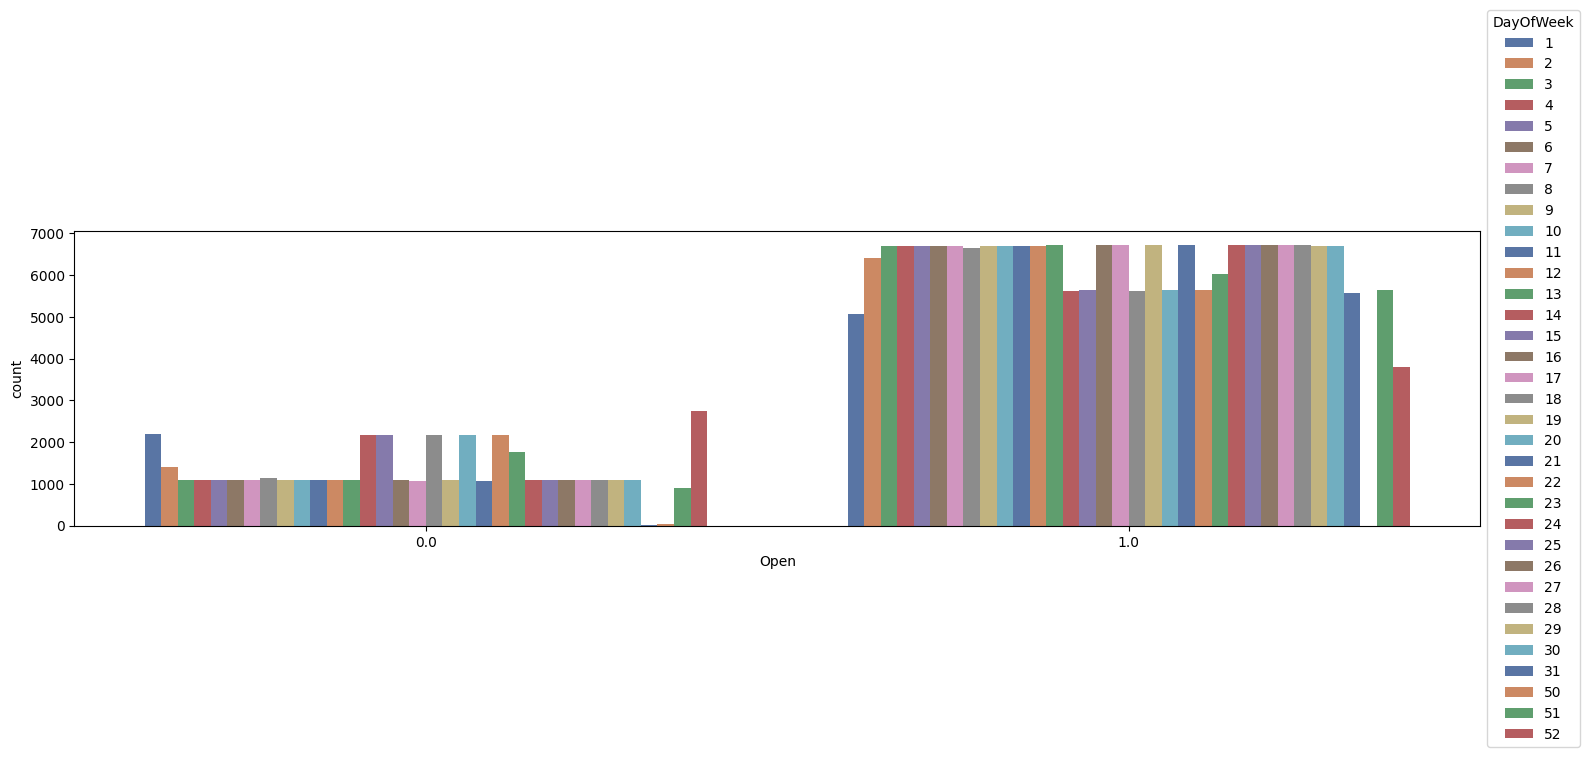

In [39]:
# Opened and closed stores in a week
fig6, ax= plt.subplots(1,1, figsize = (16,6))
sns.countplot(x = 'Open', hue = 'DayOfWeek', data = ross_data, palette= 'deep',ax=ax)

ax.legend(
    title='DayOfWeek',
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()

This countplot clearly shows that majority of stores are closed on sunday. Some stores were also closed on other days of the week may be due to public holidays, as stores are usually closed on public holidays and are open during school vacations.

**Sales and number of customers vs days of week**

<Axes: title={'center': 'Number of customers per day'}, xlabel='DayOfWeek', ylabel='Customers'>

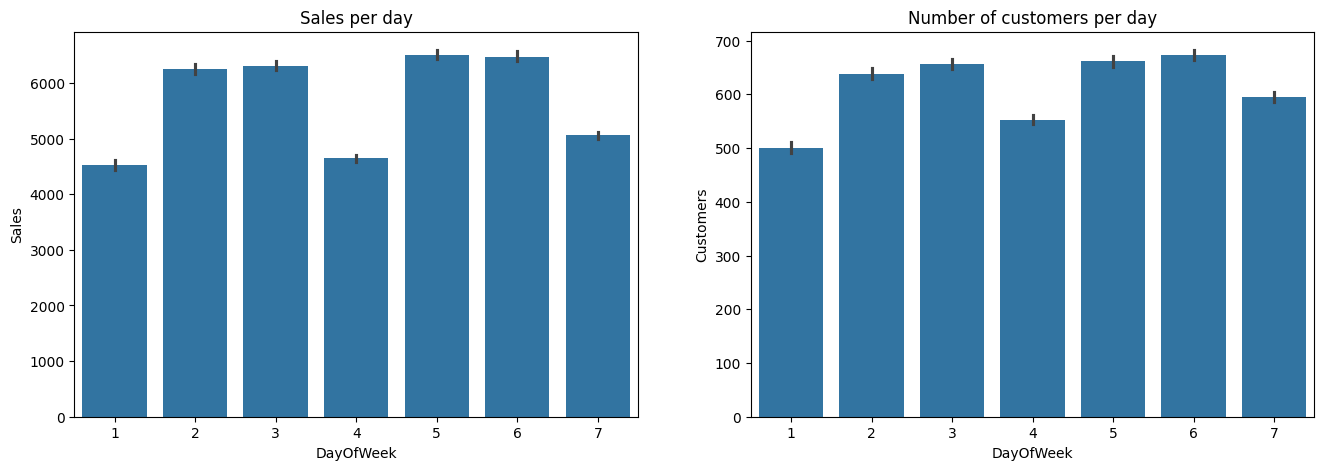

In [40]:
# Barplot
fig,(figure1, figure2) = plt.subplots(1,2, figsize = (16, 5))

# Sales per day
figure1.title.set_text('Sales per day')
sns.barplot(x = 'DayOfWeek', y = 'Sales', data = ross_data, order = [1,2,3,4,5,6,7], ax = figure1)

# Customers per day
figure2.title.set_text('Number of customers per day')
sns.barplot(x = 'DayOfWeek', y = 'Customers', data = ross_data, order = [1,2,3,4,5,6,7], ax = figure2)

This clearly shows most sales are done with the first days, but very less on the last day due to the closed shops on sunday

**Trend of Average Sales per day of week**

Text(0.5, 1.0, 'Average sales by day of the week')

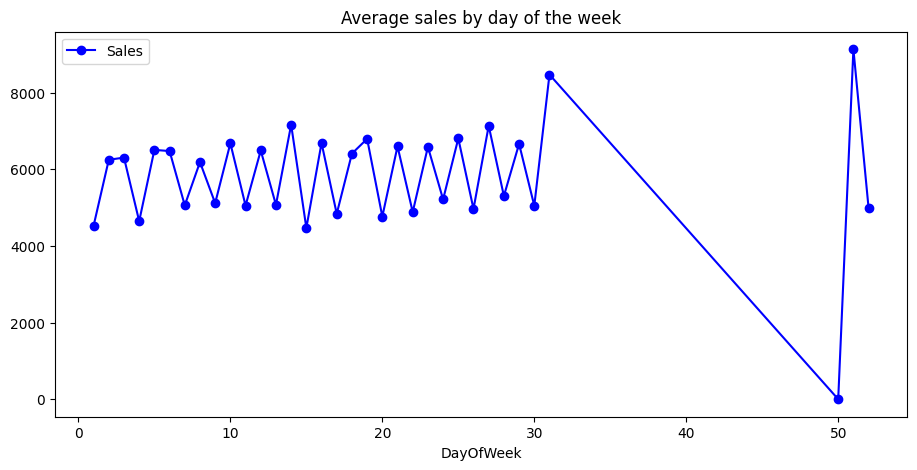

In [41]:
# Average salesplot
fig_a = ross_data.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (11,5), marker = 'o', color = 'b')
fig_a.set_title('Average sales by day of the week')

**Trend of Average number of customers per day of week**

Text(0.5, 1.0, 'Average number of customers per day of the week')

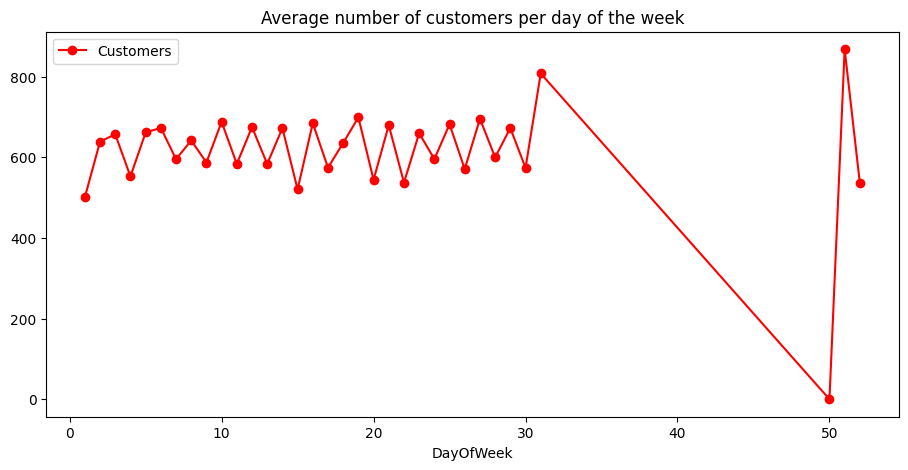

In [42]:
# Avg customers plot
fig_b = ross_data.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (11,5), marker = 'o', color = 'r')
fig_b.set_title('Average number of customers per day of the week')

**Sales per year**

<Axes: title={'center': 'Sales'}, xlabel='Year'>

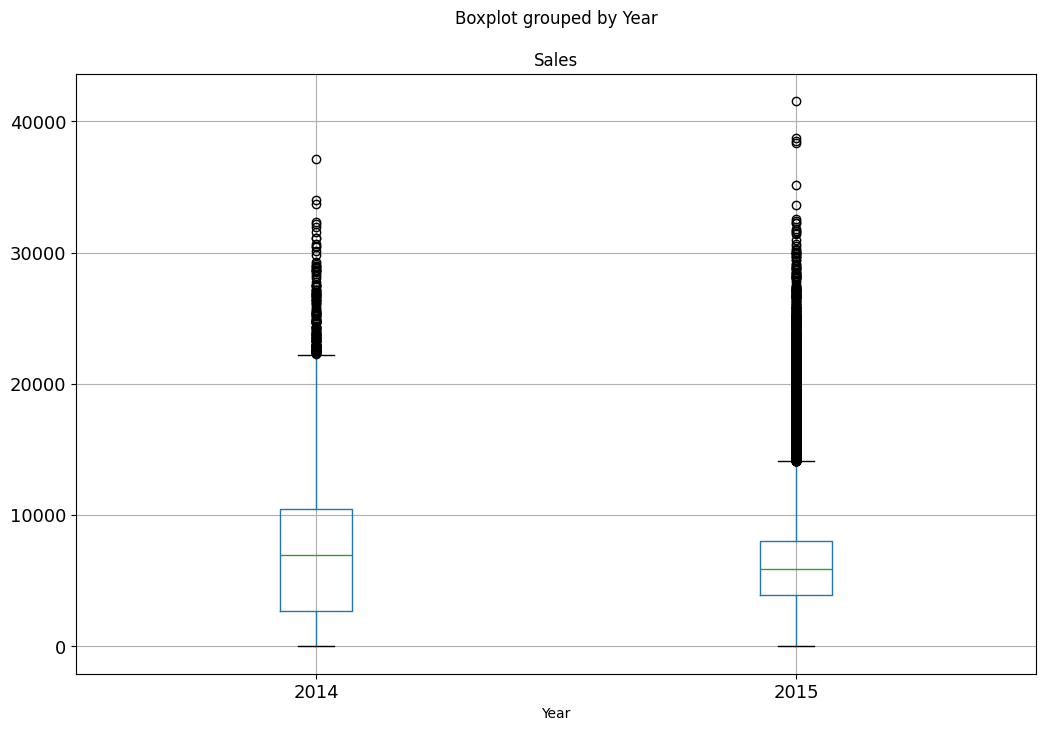

In [43]:
# Box plot
ross_data.boxplot('Sales', 'Year', figsize= (12,8), fontsize=13 )

**Sales per month**

<Axes: title={'center': 'Sales'}, xlabel='Month'>

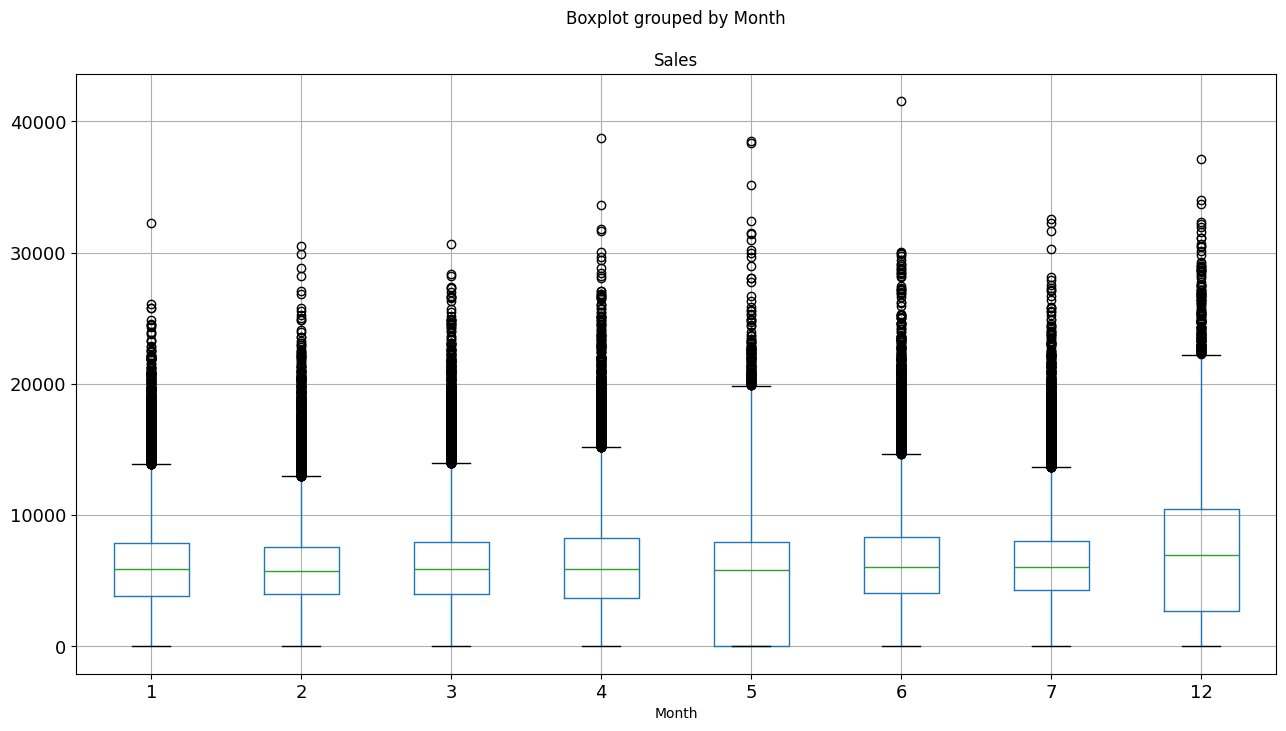

In [44]:
# Boxplot
ross_data.boxplot('Sales', 'Month', figsize= (15,8), fontsize=13 )


**Trend of Sales per month**

Text(0.5, 1.0, 'Average Sales per Month')

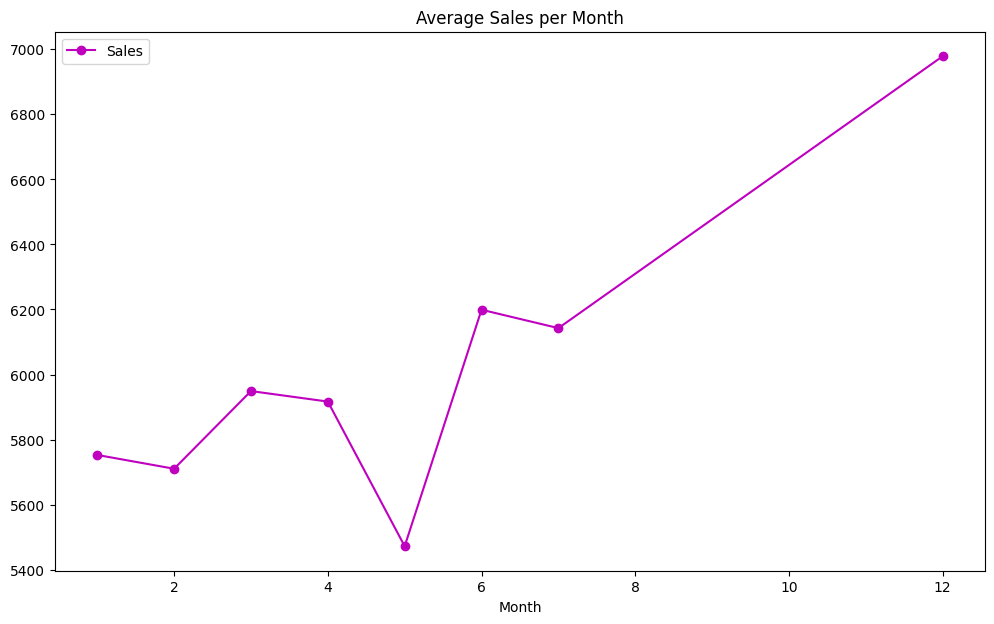

In [45]:
# Avg sales per month
fig_c = ross_data.groupby('Month')[['Sales']].mean().plot(figsize = (12,7), marker = 'o', color = 'm')
fig_c.set_title('Average Sales per Month')

**Trend of average customers per month**

Text(0.5, 1.0, 'Average Customers per Month')

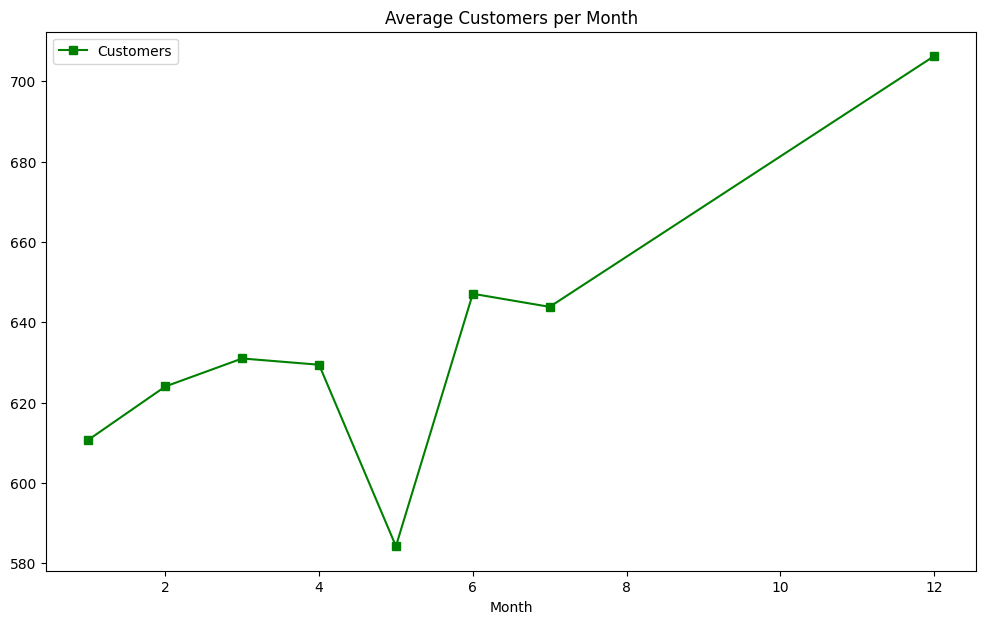

In [46]:
# Avg customers per month
fig_d = ross_data.groupby('Month')[['Customers']].mean().plot(figsize = (12,7), marker = 's', color = 'g')
fig_d.set_title('Average Customers per Month')

We can observe the significant increase in sales and number of customers in the month of december. This may be because of Christmas Holidays.

**Trend of Average sales per day of Month**

Text(0.5, 1.0, 'Average Sales per Day')

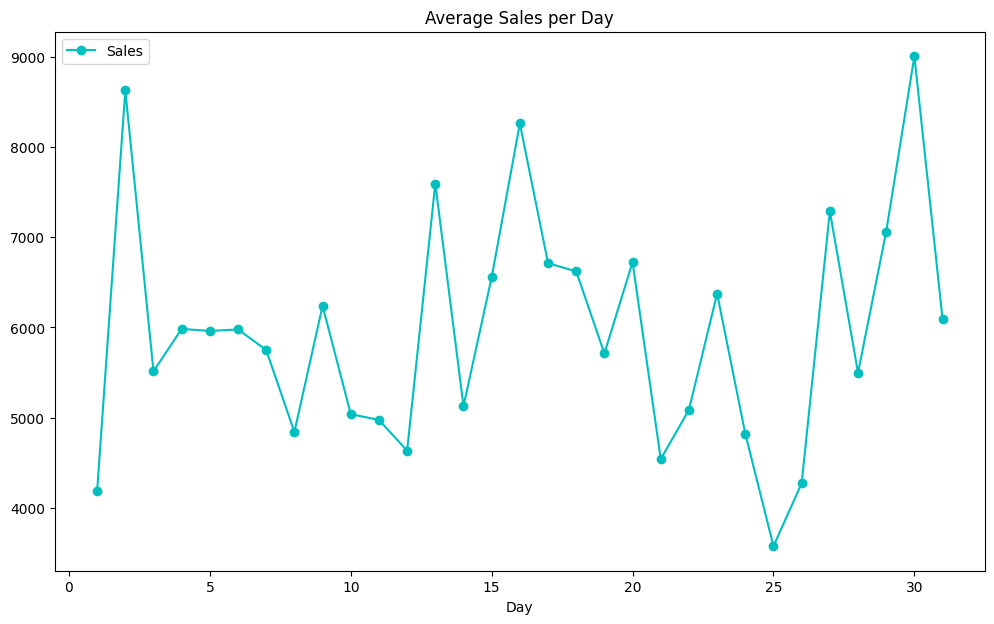

In [47]:
# Avg sales per day (Monthly)
fig_e = ross_data.groupby('Day')[['Sales']].mean().plot(figsize = (12,7), marker = 'o', color = 'c')
fig_e.set_title('Average Sales per Day')


**EDA findings:**

The best-selling and most frequently visited by customers is store of type A.

For all stores, promotion leads to increased sales and customers.

Sales are strongly correlated to the number of customers.

Stores open during school holidays have more sales than on normal days.

Each time a store participates in a promotion, we see Sales and number of customers increase significantly.

More stores are open during school holidays than on public holidays.

Sales increase during Christmas week, this may be due to people buying gifts during a Christmas holidays.

# Feature Engineering

In [48]:
# Dropping '0' in 'Open' as it indicates that store was closed
openstore_df = ross_data[ross_data['Open'] != 0]

In [49]:
# we can now drop the column 'Open' as we only included data with 'Open' = 1
openstore_df.drop('Open', axis = 1, inplace = True)
# Making a Copy
ross_df = openstore_df.copy()

In [50]:
# head
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,31,2015-07-31,5263,555.0,1.0,0,1.0,2015,7,31
1,2,31,2015-07-31,6064,625.0,1.0,0,1.0,2015,7,31
2,3,31,2015-07-31,8314,821.0,1.0,0,1.0,2015,7,31
3,4,31,2015-07-31,13995,1498.0,1.0,0,1.0,2015,7,31
4,5,31,2015-07-31,4822,559.0,1.0,0,1.0,2015,7,31


<Axes: xlabel='Sales', ylabel='Density'>

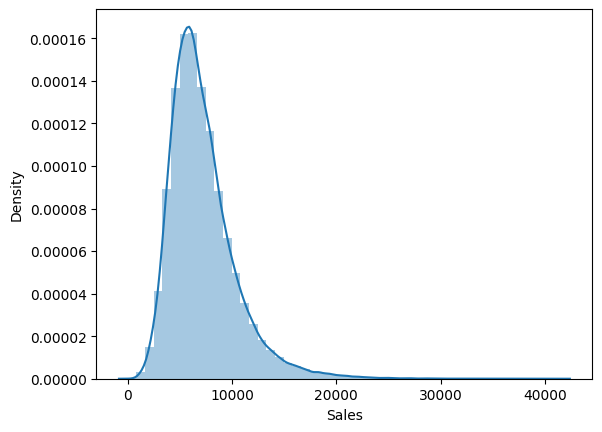

In [51]:
# Distribution of sales after we drop the closed store.
sns.distplot(ross_df['Sales'])

We can see that the spike that was present there is now gone.

In [52]:
# Checking for infinite values
np.isinf(ross_df['Sales']).sum()

np.int64(0)

In [53]:
# Checking for null
ross_df.isna().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,1
Promo,1
StateHoliday,1
SchoolHoliday,1
Year,0
Month,0


In [54]:
# info
ross_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208273 entries, 0 to 252321
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          208273 non-null  int64  
 1   DayOfWeek      208273 non-null  UInt32 
 2   Date           208273 non-null  object 
 3   Sales          208273 non-null  int64  
 4   Customers      208272 non-null  float64
 5   Promo          208272 non-null  float64
 6   StateHoliday   208272 non-null  object 
 7   SchoolHoliday  208272 non-null  float64
 8   Year           208273 non-null  int32  
 9   Month          208273 non-null  int32  
 10  Day            208273 non-null  int32  
dtypes: UInt32(1), float64(3), int32(3), int64(2), object(2)
memory usage: 16.1+ MB


In [55]:
# Creating a list of all relevant numerical features for linear regg.
num_features = list(ross_df.describe().columns)

#num_features.remove('Store')
num_features.remove('Sales')

num_features

['Store',
 'DayOfWeek',
 'Customers',
 'Promo',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day']

**Relationship between numerical features and target variable.**

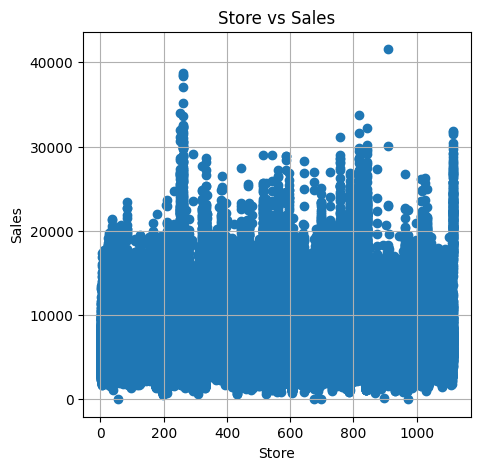

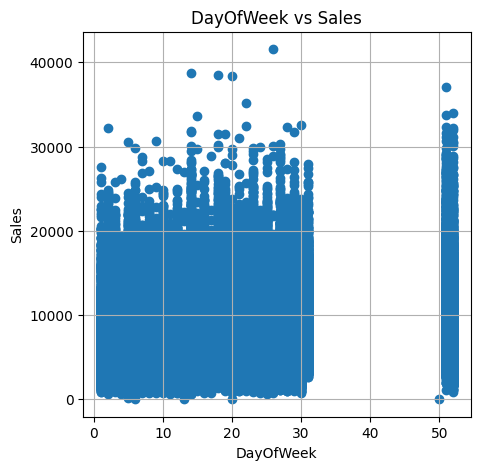

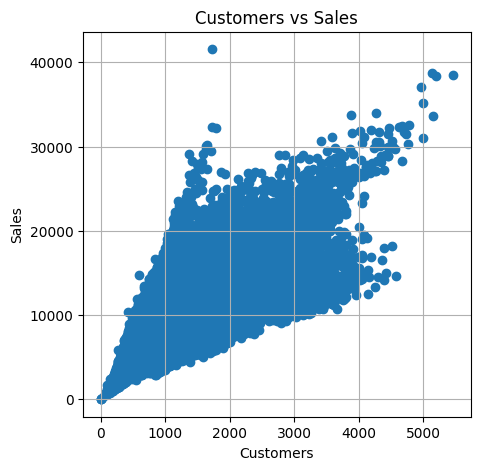

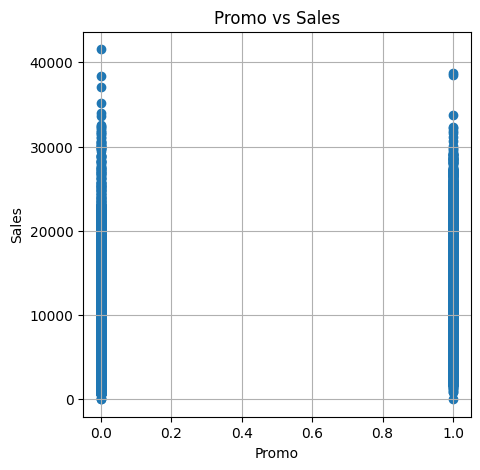

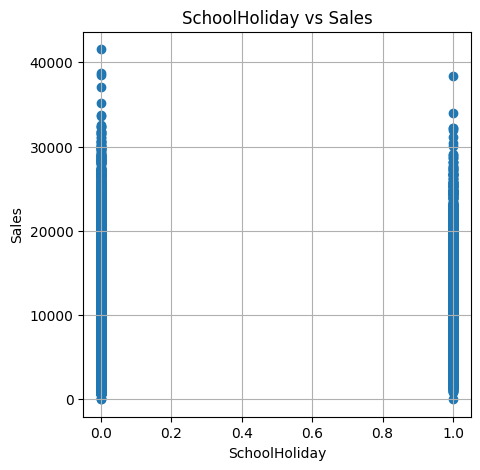

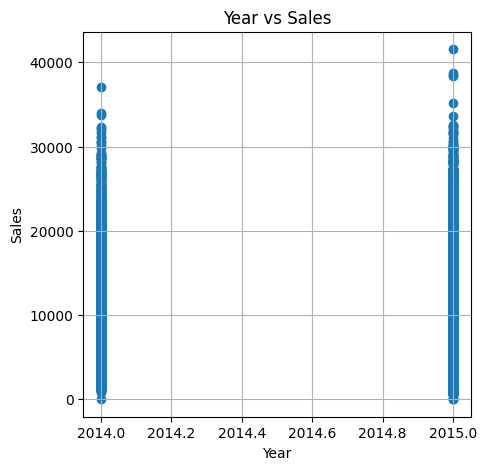

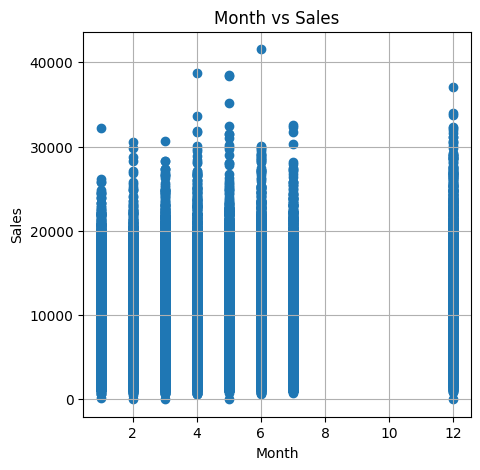

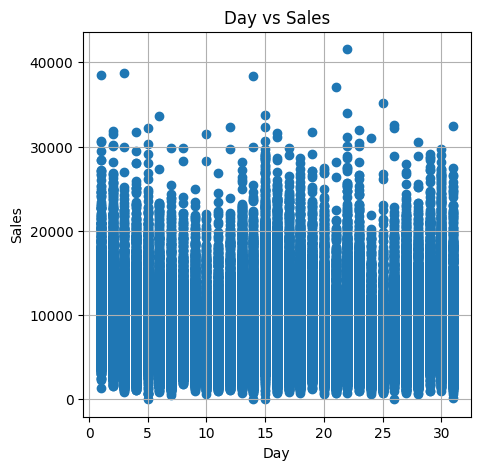

In [56]:
# Plotting the relationship between each numerical feature and the target (Sales)

for i in num_features:
    plt.figure(figsize=(5, 5))
    plt.scatter(ross_df[i], ross_df['Sales'])
    plt.xlabel(i)
    plt.ylabel('Sales')
    plt.title(f'{i} vs Sales')
    plt.grid(True)
    plt.show()

Merging both datasets

In [57]:
# Merging using left join
joined_data = pd.merge(ross_df, store, how= 'left')


**Label encoding**

Assigning each of the following categorical columns an integer value based on alphabetical order.

In [58]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

joined_data['StoreType'] = label_encoder.fit_transform(joined_data['StoreType'])
joined_data['Assortment'] = label_encoder.fit_transform(joined_data['Assortment'])
# joined_data['StateHoliday'] = label_encoder.fit_transform(joined_data['StateHoliday'])

# Head
joined_data.head().T

,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,31,31,31,31,31
Date,2015-07-31,2015-07-31,2015-07-31,2015-07-31,2015-07-31
Sales,5263,6064,8314,13995,4822
Customers,555.0,625.0,821.0,1498.0,559.0
Promo,1.0,1.0,1.0,1.0,1.0
StateHoliday,0,0,0,0,0
SchoolHoliday,1.0,1.0,1.0,1.0,1.0
Year,2015,2015,2015,2015,2015
Month,7,7,7,7,7


**Checking for multicolinearity**

In [59]:
joined_data['Date'].head()

,Date
0,2015-07-31
1,2015-07-31
2,2015-07-31
3,2015-07-31
4,2015-07-31


<Axes: >

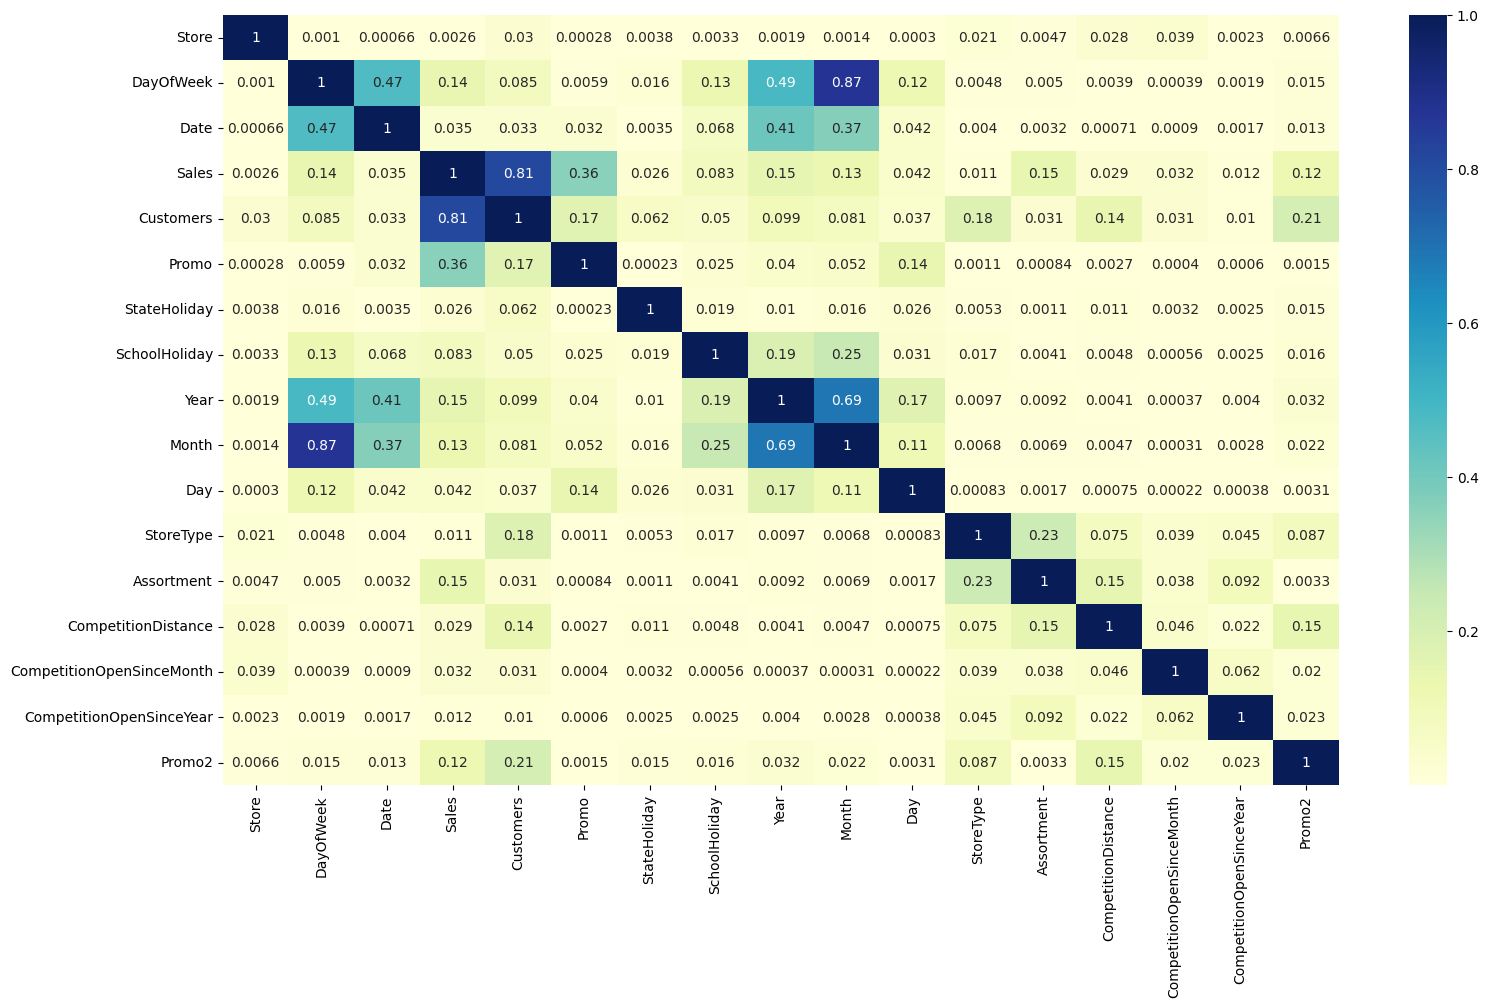

In [60]:
# correlation heat map
plt.figure(figsize = (18,10))
joined_data['Date'] = pd.to_datetime(joined_data['Date'])
correlation=joined_data.corr()
sns.heatmap(abs(correlation), annot = True, cmap = 'YlGnBu')



In [61]:
# Dropping store and date columns because they are irrelevant
joined_data.drop(['Store', 'Date'], axis = 1, inplace = True)

**Variance Inflation Factor**

In [62]:
# importing vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# defining a fuction for vif
def calculate_vif(X):
    """
    this function calculates the variance inflation factor
    """
    # VIF calculation
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [63]:
# defining a DataFrame containing on low VIF variables (as we observed above)
joined_data_vif = joined_data[[i for i in joined_data.describe().columns if i not in ['Sales','Year','CompetitionOpenSinceYear','Month','WeekOfYear']]].head()
joined_data_vif.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,Promo2
0,31,555.0,1.0,1.0,31,2,0,1270.0,9.0,0
1,31,625.0,1.0,1.0,31,0,0,570.0,11.0,1
2,31,821.0,1.0,1.0,31,0,0,14130.0,12.0,1
3,31,1498.0,1.0,1.0,31,2,2,620.0,9.0,0
4,31,559.0,1.0,1.0,31,0,0,29910.0,4.0,0


# ML Model Building

In [64]:
# importing ML models
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [65]:
# Evaluation Metrics
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

We will make a copy of merged dataframe to use it for linear regression and elastic net regression. We will use the log of 'Sales' and 'Customers' columns because it will remove the hetroscadasticity of the linear relationship betwwen then (we observed above in target columns vs numerical freatures).

In [66]:
# Copy of merged DF
joined_df_lr = joined_data.copy()

In [67]:
# log10 transformation of 'Sales'
joined_df_lr['Sales'] = np.log10(joined_df_lr['Sales'])

In [68]:
# Cheching for inf values
np.isinf(joined_df_lr['Sales']).sum()

np.int64(4)

In [69]:
# droping infinite values after transformation
joined_df_lr.drop(joined_df_lr[joined_df_lr['Sales'] == float("-inf")].index,inplace=True)

In [70]:
# log10 transformation of 'Customers'
joined_df_lr['Customers'] = np.log10(joined_df_lr['Customers'])

In [71]:
# Cheching for inf values again
np.isinf(joined_df_lr['Customers']).sum()

np.int64(0)

In [106]:
# Declaring Independent and dependent variable for linear regression and elastic net
dependent_var = 'Sales'
independent_var = joined_data_vif.columns
# Creating the datafrmae of independent variables
X_lr = joined_df_lr[independent_var].values

# Creating the dataframe of dependent variable
y_lr = joined_df_lr[dependent_var].values
# Splitting the Dataset into Test and Train
X_lr = pd.DataFrame(X_lr)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state = 0)

# Shape of train data
print(X_train_lr.shape)
# Shape of test data
print(X_test_lr.shape)

(166615, 10)
(41654, 10)


In [107]:
# Using StandardScaler to normalize the independent variables.
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_lr)
scaled_X_test = scaler.transform(X_test_lr)

**Linear Regression**

In [108]:
# Fitting Multiple Linear Regression to the Training set
# Formation of equation
regressor = LinearRegression()
regressor.fit(scaled_X_train, y_train_lr)

LinearRegression()

In [75]:
# Intercept of equation
regressor.intercept_

np.float64(3.820024059990814)

In [76]:
# Model coefficients
regressor.coef_

array([ 0.00906823,  0.15611864,  0.03623609,  0.00386071,  0.00192376,
        0.0321091 ,  0.01251963,  0.01540908, -0.00146163,  0.01473012])

In [109]:
# predicted sales from training dataset
y_pred_train = regressor.predict(scaled_X_train)

# predicted sales from testing dataset
y_pred_test = regressor.predict(scaled_X_test)

In [110]:
# Defining RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# Defining MAPE function
def mape(x, y):
    return np.mean(np.abs((x - y) / x)) * 100
# Evaluation Metrics for Linear Regression

print("Regresion Model Training Score" , ":" , regressor.score(scaled_X_train, y_train_lr),
      "Model Test Score" ,":" , regressor.score(scaled_X_test, y_test_lr))

print("Training RMSE", ":", rmse(y_train_lr, y_pred_train),
      "Testing RMSE", ":", rmse(y_test_lr, y_pred_test))

print("Training MAPE", ":", mape(y_train_lr, y_pred_train),
      "Testing MAPE", ":", mape(y_test_lr, y_pred_test))

r2 = r2_score(y_test_lr, y_pred_test)
print("R2 :" ,r2)

Regresion Model Training Score : 0.8230409087553494 Model Test Score : 0.8212395208975698
Training RMSE : 0.07674918785272773 Testing RMSE : 0.07704594546321256
Training MAPE : 1.5690135239292378 Testing MAPE : 1.578357895889727
R2 : 0.8212395208975698


In [111]:
# Performance of the model
r2s_lr = r2_score(y_train_lr,y_pred_train)
r2s2_lr = r2_score(y_test_lr,y_pred_test)

mae_lr = mae(y_train_lr,y_pred_train)
mae2_lr = mae(y_test_lr,y_pred_test)

rmse_lr = math.sqrt(mse(y_train_lr,y_pred_train))
rmse2_lr = math.sqrt(mse(y_test_lr,y_pred_test))

mse_lr = mse(y_train_lr,y_pred_train)
mse2_lr = mse(y_test_lr,y_pred_test)

print('Performance of Linear Regression Model:')
print('-'*40)

print('r2_score train:',r2s_lr)
print('r2_score test:',r2s2_lr)

print('\nMean absolute error train: %.2f' % mae_lr)
print('Mean absolute error test: %.2f' % mae2_lr)

print('\nRoot mean squared error train: ', rmse_lr)
print('Root mean squared error test: ', rmse2_lr)

print('\nMean Sq error train: %.2f' % mse_lr)
print('Mean Sq error test: %.2f' % mse2_lr)

Performance of Linear Regression Model:
----------------------------------------
r2_score train: 0.8230409087553494
r2_score test: 0.8212395208975698

Mean absolute error train: 0.06
Mean absolute error test: 0.06

Root mean squared error train:  0.07674918785272773
Root mean squared error test:  0.07704594546321256

Mean Sq error train: 0.01
Mean Sq error test: 0.01


Text(0, 0.5, 'Predicted values')

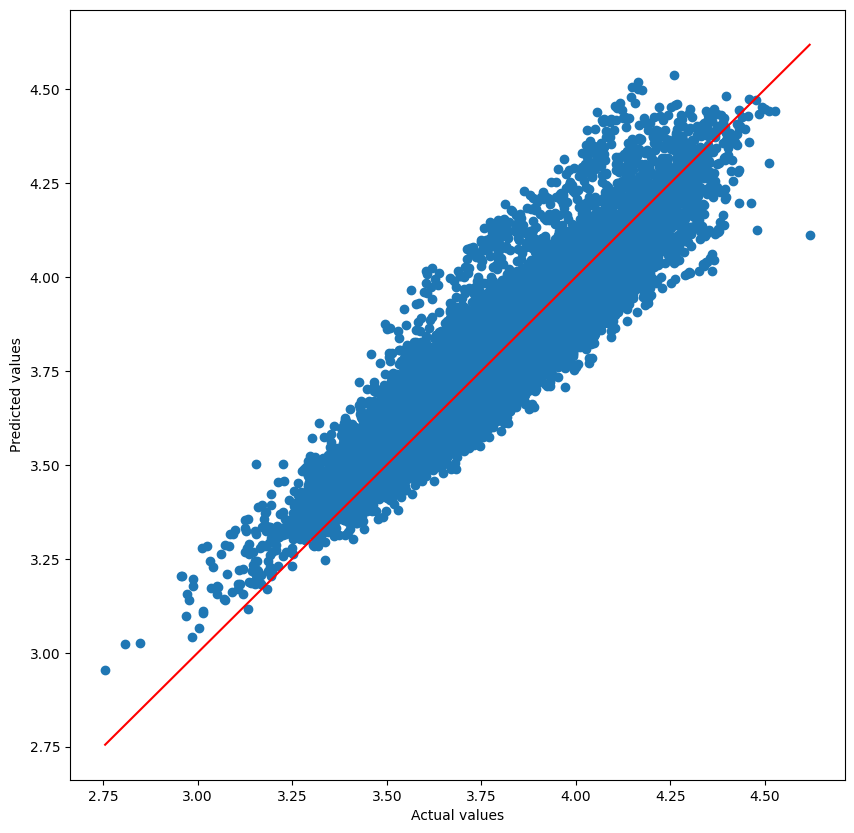

In [112]:
# Showing the optimally fitted line
plt.figure(figsize=(10,10))
plt.scatter(y_test_lr,y_pred_test)

p1 = max(max(y_pred_test),max(y_test_lr))
p2 = min(min(y_pred_test),min(y_test_lr))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

**Elastic Net Regression**

In [113]:
# ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
# Model fitting
elasticnet.fit(scaled_X_train,y_train_lr)

ElasticNet(alpha=0.1)

In [114]:
# Elasticnet score
elasticnet.score(scaled_X_train, y_train_lr)

0.6306066530676655

In [115]:
# Predicting test set
y_pred_en = elasticnet.predict(scaled_X_test)
MSE  = mse(y_test_lr, y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test_lr,y_pred_en)
print("R2 :" ,r2)

MSE : 0.012290710967824853
RMSE : 0.11086347896320435
R2 : 0.6298745589940982


**Xgboost Model**

In [84]:
# decalring independent and dependent variables
target_col = 'Sales'
input_cols = joined_data.columns.drop(target_col)
input_cols

Index(['DayOfWeek', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'Year', 'Month', 'Day', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2'],
      dtype='object')

We will use these independent and dependent variables for Xgboost, Decision Tree and Random forest because previous independent and dependent variables contain log10 transformation of 'Sales' and 'Customers' columns also, the following three models can handle multicolinearity.

In [85]:
# train test split
X_train, X_test, y_train, y_test  = train_test_split(joined_data[input_cols], joined_data[target_col], test_size = 0.2, random_state = 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((166618, 14), (41655, 14), (166618,), (41655,))

In [86]:
# standard scaler to nornamlise the data
scaler = StandardScaler()
scale_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.transform(X_test)
scale_X_train[0:10]

array([[ 0.73962059, -1.025053  , -0.92702124, -0.03602862, -0.4678616 ,
         0.24902208,  0.55886937,  0.76364231,  1.31029041, -0.9363688 ,
        -0.52508573,  0.43781786,  0.53919568,  0.98823376],
       [-0.48823963, -0.51523584,  1.07872394, -0.03602862, -0.4678616 ,
         0.24902208, -0.54605295, -0.04852936,  1.31029041,  1.07855948,
         1.70476083,  0.43781786,  0.53919568,  0.98823376],
       [-1.01446544, -0.88441378,  1.07872394, -0.03602862, -0.4678616 ,
         0.24902208, -0.91436038, -1.44082366,  1.31029041,  1.07855948,
         0.99502958,  0.43781786,  0.53919568,  0.98823376],
       [ 0.56421199, -1.13806666, -0.92702124, -0.03602862, -0.4678616 ,
         0.24902208,  0.55886937, -0.97672556,  1.31029041, -0.9363688 ,
        -0.66057988,  0.43781786,  0.53919568,  0.98823376],
       [ 0.56421199,  1.42608765, -0.92702124, -0.03602862, -0.4678616 ,
         0.24902208,  0.55886937, -0.39660294, -0.88638417, -0.9363688 ,
        -0.62573852, -2.44

In [87]:
# Building XGBoost Regressor Model:
xgb = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)
xgb.fit(scale_X_train,y_train)

y_predict_xgb = xgb.predict(scale_X_test)

In [88]:
#Performance of the model
r2s_xgb = r2_score(y_test,y_predict_xgb)
mae_xgb = mae(y_test,y_predict_xgb)
rmse_xgb = math.sqrt(mse(y_test,y_predict_xgb))
print('Performance of XGBoost Regressor Model:')
print('-'*40)
print('r2_score:',r2s_xgb)
print('Mean absolute error: %.2f' % mae_xgb)
print('Root mean squared error: ', rmse_xgb)

Performance of XGBoost Regressor Model:
----------------------------------------
r2_score: 0.8775317668914795
Mean absolute error: 806.82
Root mean squared error:  1100.4509303008472


**DecisionTree Model**

In [89]:
# Building Decesion Tree Regressor Model:

model = DecisionTreeRegressor()
model.fit(scale_X_train,y_train)

y_predict_dt = model.predict(scale_X_test)
# Performance of the model
r2s_3 = r2_score(y_test,y_predict_dt)
mae3 = mae(y_test,y_predict_dt)
rmse3 = math.sqrt(mse(y_test,y_predict_dt))
print('Performance of Decesion Tree Model:')
print('-'*40)
print('r2_score:',r2s_3)
print('Mean absolute error: %.2f' % mae3)
print('Root mean squared error: ', rmse3)

Performance of Decesion Tree Model:
----------------------------------------
r2_score: 0.9265146606644056
Mean absolute error: 559.15
Root mean squared error:  852.4310679621993


**Random Forest Regression Model**

In [90]:
# Building Random Forest Regressor Model:

random_forest_model = RandomForestRegressor(n_estimators=100)
random_forest_model.fit(scale_X_train,y_train)

y_predict_rf = random_forest_model.predict(scale_X_test)
# Performance of the model
r2s_4 = r2_score(y_test,y_predict_rf)
mae4 = mae(y_test,y_predict_rf)
rmse4 = math.sqrt(mse(y_test,y_predict_rf))
print('Performance of Random Forest Regression Model:')
print('-'*40)
print('r2_score:', r2s_4)
print('Mean absolute error: %.2f' % mae4)
print('Root mean squared error: ', rmse4)

Performance of Random Forest Regression Model:
----------------------------------------
r2_score: 0.9619951014959814
Mean absolute error: 411.99
Root mean squared error:  613.0257344124079


In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Reduce the parameter grid to meaningful values
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, None],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [50, 100, 150]

rfr = RandomForestRegressor(random_state=1)

g_search = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,       # Use all CPU cores
    verbose=1,
    return_train_score=True
)

g_search.fit(scale_X_train, y_train)

print("Best Params:", g_search.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150}


In [100]:
# Model prediction train set
y_pred_RandomForest_tuned_train = g_search.predict(scale_X_train)
# Model prediction test set
y_pred_RandomForest_tuned_test = g_search.predict(scale_X_test)
print("Regresion Model Training Score" , ":" , g_search.score(scale_X_train, y_train),
      "Model Test Score" ,":" , g_search.score(scale_X_test, y_test))

print("Training RMSE", ":", rmse(y_train, y_pred_RandomForest_tuned_train),
      "Testing RMSE", ":", rmse(y_test, y_pred_RandomForest_tuned_test))

print("Training MAPE", ":", mape(y_train, y_pred_RandomForest_tuned_train),
      "Testing MAPE", ":", mape(y_test, y_pred_RandomForest_tuned_test))

r2 = r2_score(y_test, y_pred_RandomForest_tuned_test)
print("R2 :" ,r2)

Regresion Model Training Score : 0.9922570719132283 Model Test Score : 0.9428208669632405
Training RMSE : 278.62132359813575 Testing RMSE : 751.9304995227579
Training MAPE : inf Testing MAPE : inf
R2 : 0.9428208669632405


**Feature importance**

In [96]:
#Lets Find Importance of each Feature
feature_importance = random_forest_model.feature_importances_
# Lets make a dataframe consists of features and values
columns_1 = list(X_train.columns)
feature_importance_df = pd.DataFrame({'Features':columns_1, 'Importance':feature_importance})
feature_importance_df.set_index('Features', inplace=True)
feature_importance_df.sort_values(by= 'Importance', ascending = False, inplace = True)
feature_importance_df

,Importance
Features,
Customers,0.736445
CompetitionDistance,0.074526
StoreType,0.063508
Promo,0.033275
CompetitionOpenSinceYear,0.020596
Assortment,0.017790
CompetitionOpenSinceMonth,0.017510
Day,0.010953
Promo2,0.010216


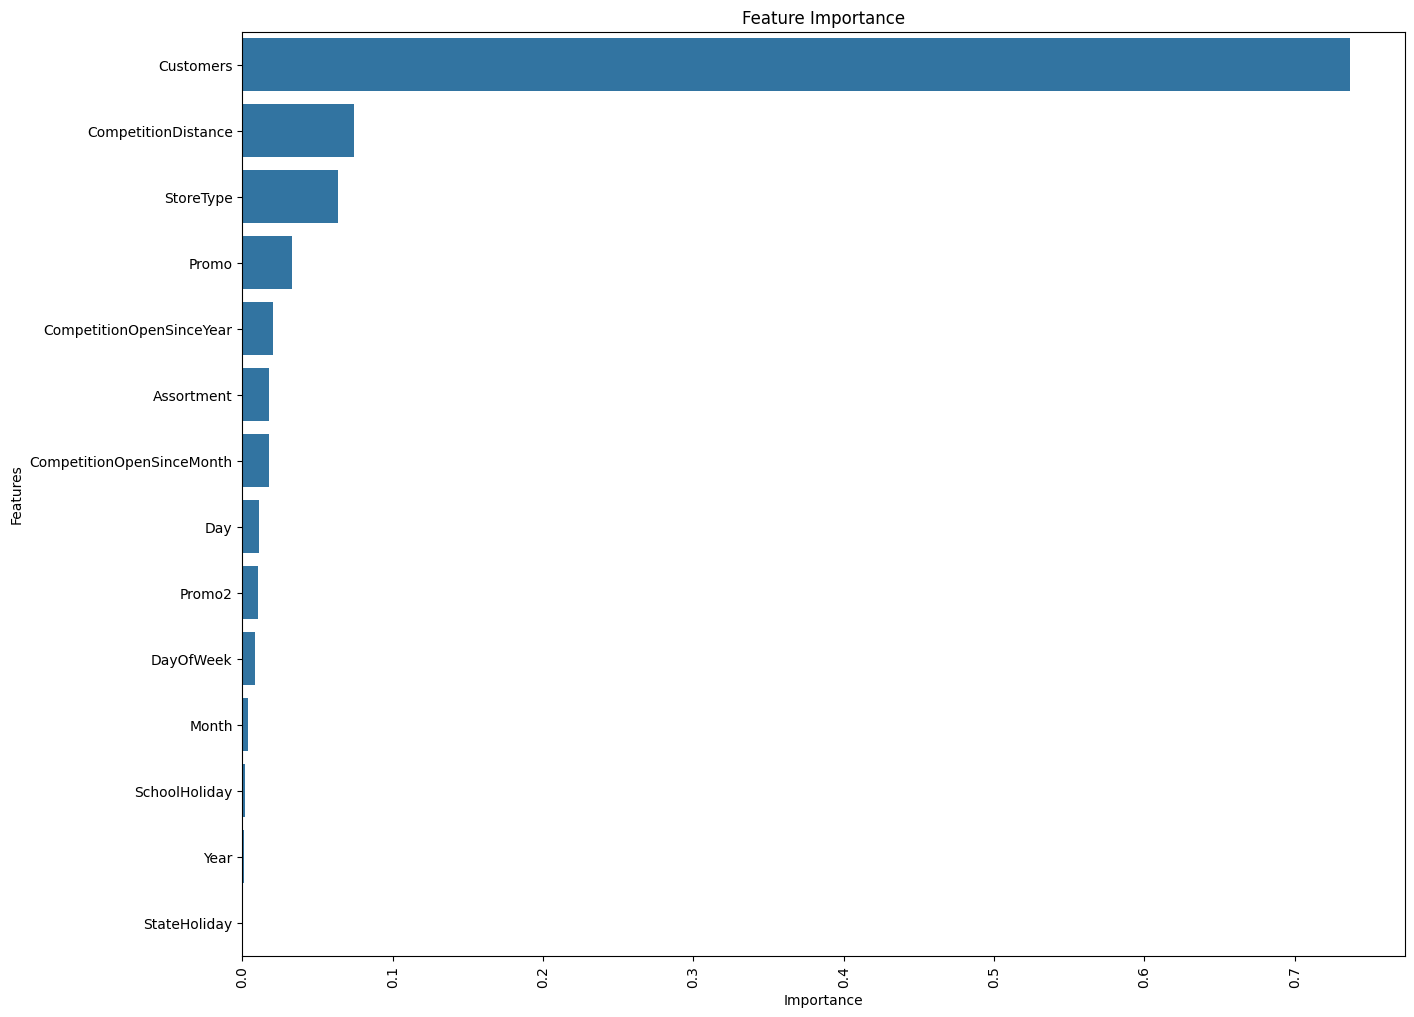

In [97]:
# Feature Importance
Features_imp = feature_importance_df.index

plt.figure(figsize=(15,12))
sns.barplot(y= Features_imp, x=feature_importance_df['Importance'], data = feature_importance_df ).set(title='Feature Importance')
plt.xticks(rotation=90)
plt.show()

**Observation**:-

As per our model; Customer, store Type, CompetitionDistance and Promo are the most important features which are having the most impact on Target Variable i.e. Sales Column.

# Conclusion from ML models
By Looking at the evaluation metrices obtained on implementing different sort of regression model, we decided to go with the Random Forest Tuned model.The maximum R^2 was seen in tuned Random Forest model with the value 0.99225. It means our best accurate model is able to explain approx/almost 99% of variances in the datasets.

Based on our model; Customer, store Type, Promo & CompetitionDistance are the most impactful features which are driving the sales more as compared to other features present in the dataset.

**Suggestions from our Analysis**

More stores should be encouraged for promotion.

Store type 'b' should be increased in number.

There is seasonality involved. Hence, the stores should be encouraged to promote and take advantages of the holidays.



In [116]:
#Saving the Best model

models = {
    "Linear Regression": r2_score(y_test_lr, y_pred_test),
    "Elastic Net": r2_score(y_test_lr, y_pred_en),
    "XGBoost": r2_score(y_test, y_predict_xgb),
    "Decision Tree": r2_score(y_test, y_predict_dt),
    "Random Forest": r2_score(y_test, y_predict_rf)
}

best_model_name = max(models, key=models.get)
print("BEST MODEL:", best_model_name)

BEST MODEL: Random Forest


In [119]:
if best_model_name == "XGBoost":
    best_model = xgb
elif best_model_name == "Random Forest":
    best_model = g_search # Using the tuned Random Forest model
elif best_model_name == "Decision Tree":
    best_model = model
elif best_model_name == "Linear Regression":
    best_model = regressor
else:
    best_model = elasticnet

import joblib
joblib.dump(best_model, "rossmann_sales_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model saved Successfully!")

Model saved Successfully!
